In [6]:
# Requirements: scikit-learn, matplotlib, numpy
# pip install scikit-learn matplotlib numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA



In [13]:
# 1. Load dataset (Iris - real dataset)
data = load_iris()
print(data.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:

X = data.data          # (150, 4)
y = data.target        # 3 classes: 0,1,2

# data.data → Feature Matrix (150 × 4)
# contains the measurements of the flowers.
# There are 150 rows (because Iris dataset contains 150 samples).
# There are 4 columns (because each flower has 4 features).

# The 4 features:

#     sepal length (cm)
#     sepal width (cm)
#     petal length (cm)
#     petal width (cm)

# data.target → Labels (150 values)
# Meaning:

# These are the species labels for each flower.
# There are 150 labels, one for each sample.

# The labels are encoded as:
# Label	Species
# 0	Iris-setosa
# 1	Iris-versicolor
# 2	Iris-virginica
# So every flower’s species is represented as 0, 1, or 2. This is your output y for machine learning.

In [16]:
# OPTION A: Binary classification (choose two classes, e.g., setosa vs versicolor)
# We are filtering the Iris dataset to keep only Setosa (0) and Versicolor (1), because a single-layer perceptron can only do binary classification.
mask = (y != 2)         # drop class 2 (virginica) to create a binary problem
X_bin = X[mask]
y_bin = y[mask]         # labels 0 and 1

In [17]:

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.25, random_state=42, stratify=y_bin)

In [18]:

# 3. Feature scaling (important!)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

In [20]:
''' 
max_iter=1000
    Maximum number of passes (epochs) over the training data.
    The perceptron will stop earlier if convergence is reached.

✔ tol=1e-3
Tolerance for stopping.
If the improvement in loss/error is less than 0.001 → stop training early.Helps prevent unnecessary extra epochs.

✔ eta0=0.1
Learning rate of the perceptron.Controls how big the weight updates are.Equivalent to η in the update rule:

'''

# 4. Create and train Perceptron
clf = Perceptron(max_iter=1000, tol=1e-3, eta0=0.1, random_state=42)  # eta0 = learning rate
clf.fit(X_train_s, y_train)

Perceptron(eta0=0.1, random_state=42)

In [22]:
'''
After training, the perceptron learns:

✔ clf.coef_ → learned weights
✔ clf.intercept_ → learned bias
✔ clf.predict() → predict new samples
'''
print(clf.coef_)
print(clf.intercept_)

# 5. Predict & evaluate
y_pred = clf.predict(X_test_s)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

[[ 0.13955174 -0.0402235   0.09867248  0.09300765]]
[0.1]
Accuracy: 1.0
Confusion matrix:
 [[13  0]
 [ 0 12]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



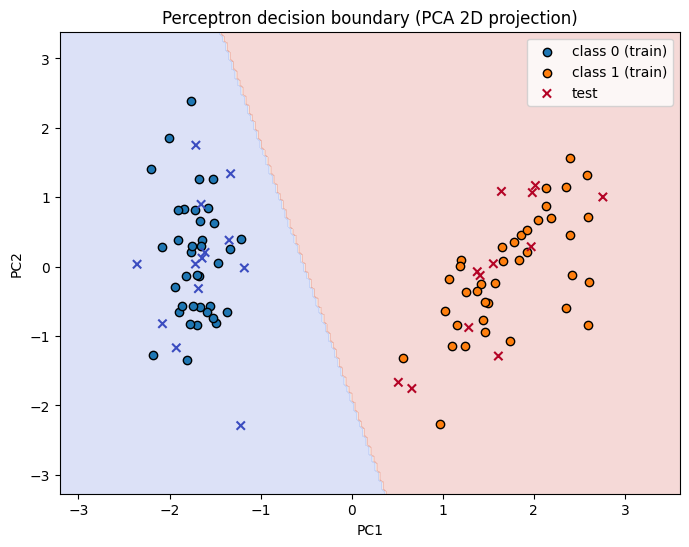

In [23]:

# 6. Visualize decision boundary in 2D using PCA projection
pca = PCA(n_components=2)
X_all = np.vstack([X_train_s, X_test_s])
pca.fit(X_all)
X_train2 = pca.transform(X_train_s)
X_test2  = pca.transform(X_test_s)

# retrain a perceptron on 2D projection for clear plotting
clf2 = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
clf2.fit(X_train2, y_train)

# plotting
xx = np.linspace(X_train2[:,0].min()-1, X_train2[:,0].max()+1, 200)
yy = np.linspace(X_train2[:,1].min()-1, X_train2[:,1].max()+1, 200)
XX, YY = np.meshgrid(xx, yy)
grid = np.c_[XX.ravel(), YY.ravel()]
Z = clf2.predict(grid).reshape(XX.shape)

plt.figure(figsize=(8,6))
plt.contourf(XX, YY, Z, alpha=0.2, cmap='coolwarm')
plt.scatter(X_train2[y_train==0,0], X_train2[y_train==0,1], label='class 0 (train)', edgecolor='k')
plt.scatter(X_train2[y_train==1,0], X_train2[y_train==1,1], label='class 1 (train)', edgecolor='k')
plt.scatter(X_test2[:,0], X_test2[:,1], c=y_test, marker='x', label='test', cmap='coolwarm')
plt.legend()
plt.title('Perceptron decision boundary (PCA 2D projection)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()
